In [127]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_vector

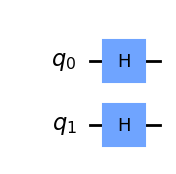

In [128]:
# 2量子ビットの場合
grover_circuit = QuantumCircuit(2)
grover_circuit.h([0,1])
grover_circuit.draw(output="mpl", filename="gc2-1.png")

In [129]:
state = Statevector.from_instruction(grover_circuit)
state.draw("latex")

<IPython.core.display.Latex object>

In [130]:
state.draw("text")

[0.5+0.j,0.5+0.j,0.5+0.j,0.5+0.j]

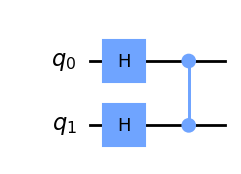

In [131]:
# オラクルを追加。（正解にマークをつける）
# |11>を正解として、制御Zゲートで|11>の位相を反転させる。
grover_circuit.cz(0,1)
grover_circuit.draw(output="mpl", filename="gc2-2.png")

In [132]:
state = Statevector.from_instruction(grover_circuit)
state.draw("latex")

<IPython.core.display.Latex object>

In [133]:
state.draw("text")

[ 0.5+0.j, 0.5+0.j, 0.5+0.j,-0.5+0.j]

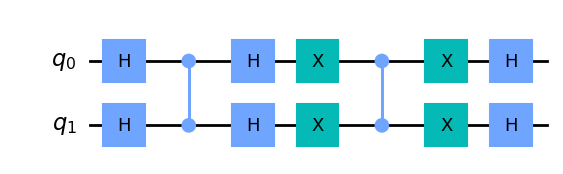

In [134]:
# 振幅増幅。
# 正解のマークがついているヤツの位相を反転して増幅する、らしい。
grover_circuit.h([0,1])
grover_circuit.x([0,1])
grover_circuit.cz(0,1)
grover_circuit.x([0,1])
grover_circuit.h([0,1])
grover_circuit.draw(output="mpl", filename="gc2-3.png")

In [135]:
state = Statevector.from_instruction(grover_circuit)
state.draw("latex")

<IPython.core.display.Latex object>

In [136]:
state.draw("text")

[-1.26316153e-34+0.j,-2.36158002e-17+0.j,-9.52420783e-18+0.j,
 -1.00000000e+00+0.j]

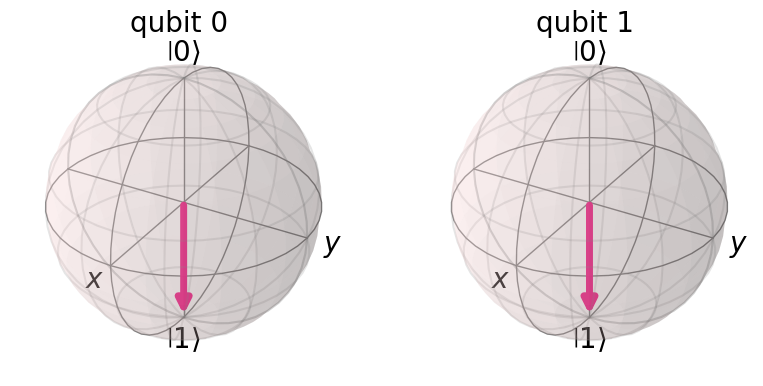

In [137]:
state.draw("bloch")

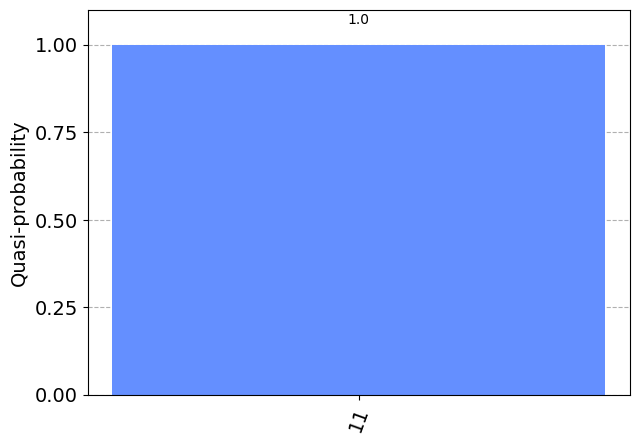

In [138]:
backend = Aer.get_backend('statevector_simulator')
result = execute(grover_circuit, backend).result()
counts = result.get_counts()
plot_histogram(counts)
